# Exploratory Data Analysis
Sample notebook showcases how to query data from a Delta table via the Databricks SQL Connector python library, and perform some basic analysis (descriptive statistics and charting).

Databricks query logic was adapted from Lee Harper's excellent blog located [here](https://www.catapultsystems.com/blogs/querying-azure-databricks-delta-tables-directly-using-python/).

### Import required packages and connect to AML workspace

In [5]:
import pandas as pd
from azureml.core import Workspace
from databricks import sql as dbsql 

ws = Workspace.from_config()
kv = ws.get_default_keyvault()

### Load secrets from default Azure Key Vault for connection to Databricks
<i>Note:</i> These secrets can be set using the following syntax `kv.set_secret('key', 'value')`

In [6]:
pat = kv.get_secret('dbxpat') # Personal Access Token
http_path = kv.get_secret('dbxhttppath') # Databricks Table HTTP Path
server_hostname = kv.get_secret('dbxservername') # Databricks server name

### Load data from Databricks Delta

In [7]:
# Configuration variables - from your keyvault and Databricks 
databricks_pat = pat
server_hostname = server_hostname
http_path = http_path
 
# Define the connection to the SQL endpoint 
connection = dbsql.connect( 
    server_hostname = server_hostname,
    http_path = http_path,
    access_token = databricks_pat
)
 
# Represent the query as a string 
sql_query = "SELECT * FROM default.mfg001" 
 
# Execute the query 
with connection.cursor() as cursor: 
# Get the data 
    cursor.execute(sql_query) 
    data = cursor.fetchall() 
    cursor.execute("SHOW COLUMNS IN default.mfg001") 
    columns = cursor.fetchall() 

columns = [column[0] for column in columns] 
df = pd.DataFrame(data=data, columns=columns)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,2022-09-02 16:58:00+00:00,2.453588,49.522570,53.342010,44.487850,626.620361,70.93674,14.78588,16.65220,15.18374,...,35.156250,37.500000,44.53125,50.34722,48.90046,57.00232,56.712960,256.6551,80.72916,NORMAL
1,2022-09-02 16:59:00+00:00,2.455556,49.565970,53.385410,44.487846,632.407410,69.75994,14.85822,16.65220,15.22714,...,34.895830,37.500000,45.31250,53.53009,48.32176,56.42361,55.266200,260.4167,79.86111,NORMAL
2,2022-09-02 17:00:00+00:00,2.448669,49.565971,53.428820,44.487846,631.944458,70.33121,14.89439,16.67390,15.22714,...,34.114582,36.718750,45.31250,53.81944,47.45370,55.26620,52.083330,263.3102,77.25694,NORMAL
3,2022-09-02 17:01:00+00:00,2.448669,49.565971,53.428820,44.487846,631.944458,70.33121,14.89439,16.67390,15.22714,...,34.114582,36.718750,45.31250,53.81944,47.45370,55.26620,52.083330,263.3102,77.25694,NORMAL
4,2022-09-02 17:02:00+00:00,2.453588,49.565971,53.342010,44.487846,639.699097,70.08960,14.82928,16.65220,15.18374,...,34.114580,36.458330,46.09375,54.97685,48.03241,55.55556,50.925930,272.2801,75.52084,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208781,2022-09-20 23:55:00+00:00,2.407350,47.699650,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,30.468750,30.208330,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.64580,NORMAL
208782,2022-09-20 23:56:00+00:00,2.400463,47.699650,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,30.208332,29.947920,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.25000,NORMAL
208783,2022-09-20 23:57:00+00:00,2.396528,47.699650,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,29.947920,30.208330,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.38190,NORMAL
208784,2022-09-20 23:58:00+00:00,2.406366,47.699650,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,29.947916,30.208332,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.93520,NORMAL


### Describe data

In [8]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
count,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.00000,208786.000000,208786.000000,...,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000,208786.000000
mean,2.378394,48.062198,51.457807,44.095530,618.132094,74.099791,13.730394,16.05661,15.375230,14.989268,...,70.554386,35.680452,35.492313,44.264688,43.231303,43.598483,48.660483,44.924569,156.843988,58.272856
std,0.394642,2.456810,2.428231,1.760128,76.991214,13.474374,1.488041,1.39568,1.359397,1.348993,...,18.973606,7.052665,7.135388,8.407103,11.503788,12.621288,14.848551,10.323296,79.841417,18.574755
min,0.000000,0.000000,33.810760,33.289930,2.798032,0.000000,0.014468,0.00000,0.028935,0.007234,...,23.958330,20.833330,22.656250,25.260416,26.620370,26.620370,27.488426,27.777780,27.199070,27.777779
25%,2.438831,46.657990,50.607635,43.055550,627.893500,70.189770,13.353590,15.91435,15.183740,15.053530,...,58.854160,32.812500,33.072910,40.104164,37.615740,37.615740,40.798611,39.641200,90.277780,48.321760
50%,2.456539,48.220490,51.736110,44.314236,633.217590,75.481370,13.650170,16.16753,15.494790,15.082470,...,66.927080,35.156250,35.156250,43.229160,40.798610,40.509260,45.138890,42.534721,143.807900,53.240740
75%,2.499826,49.522570,52.821180,45.355900,637.962952,80.505373,14.539930,16.42795,15.697340,15.118630,...,78.385410,37.760410,37.500000,46.875000,45.428240,45.138890,51.793980,46.875000,212.673600,61.342590
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,21.390340,23.59664,24.348960,25.000000,...,512.760400,420.312500,330.468800,393.229200,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700


### Drop rows with any null values

In [11]:
df.dropna(inplace=True)

### Chart all sensor outputs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2361683ac0>,
      dtype=object)

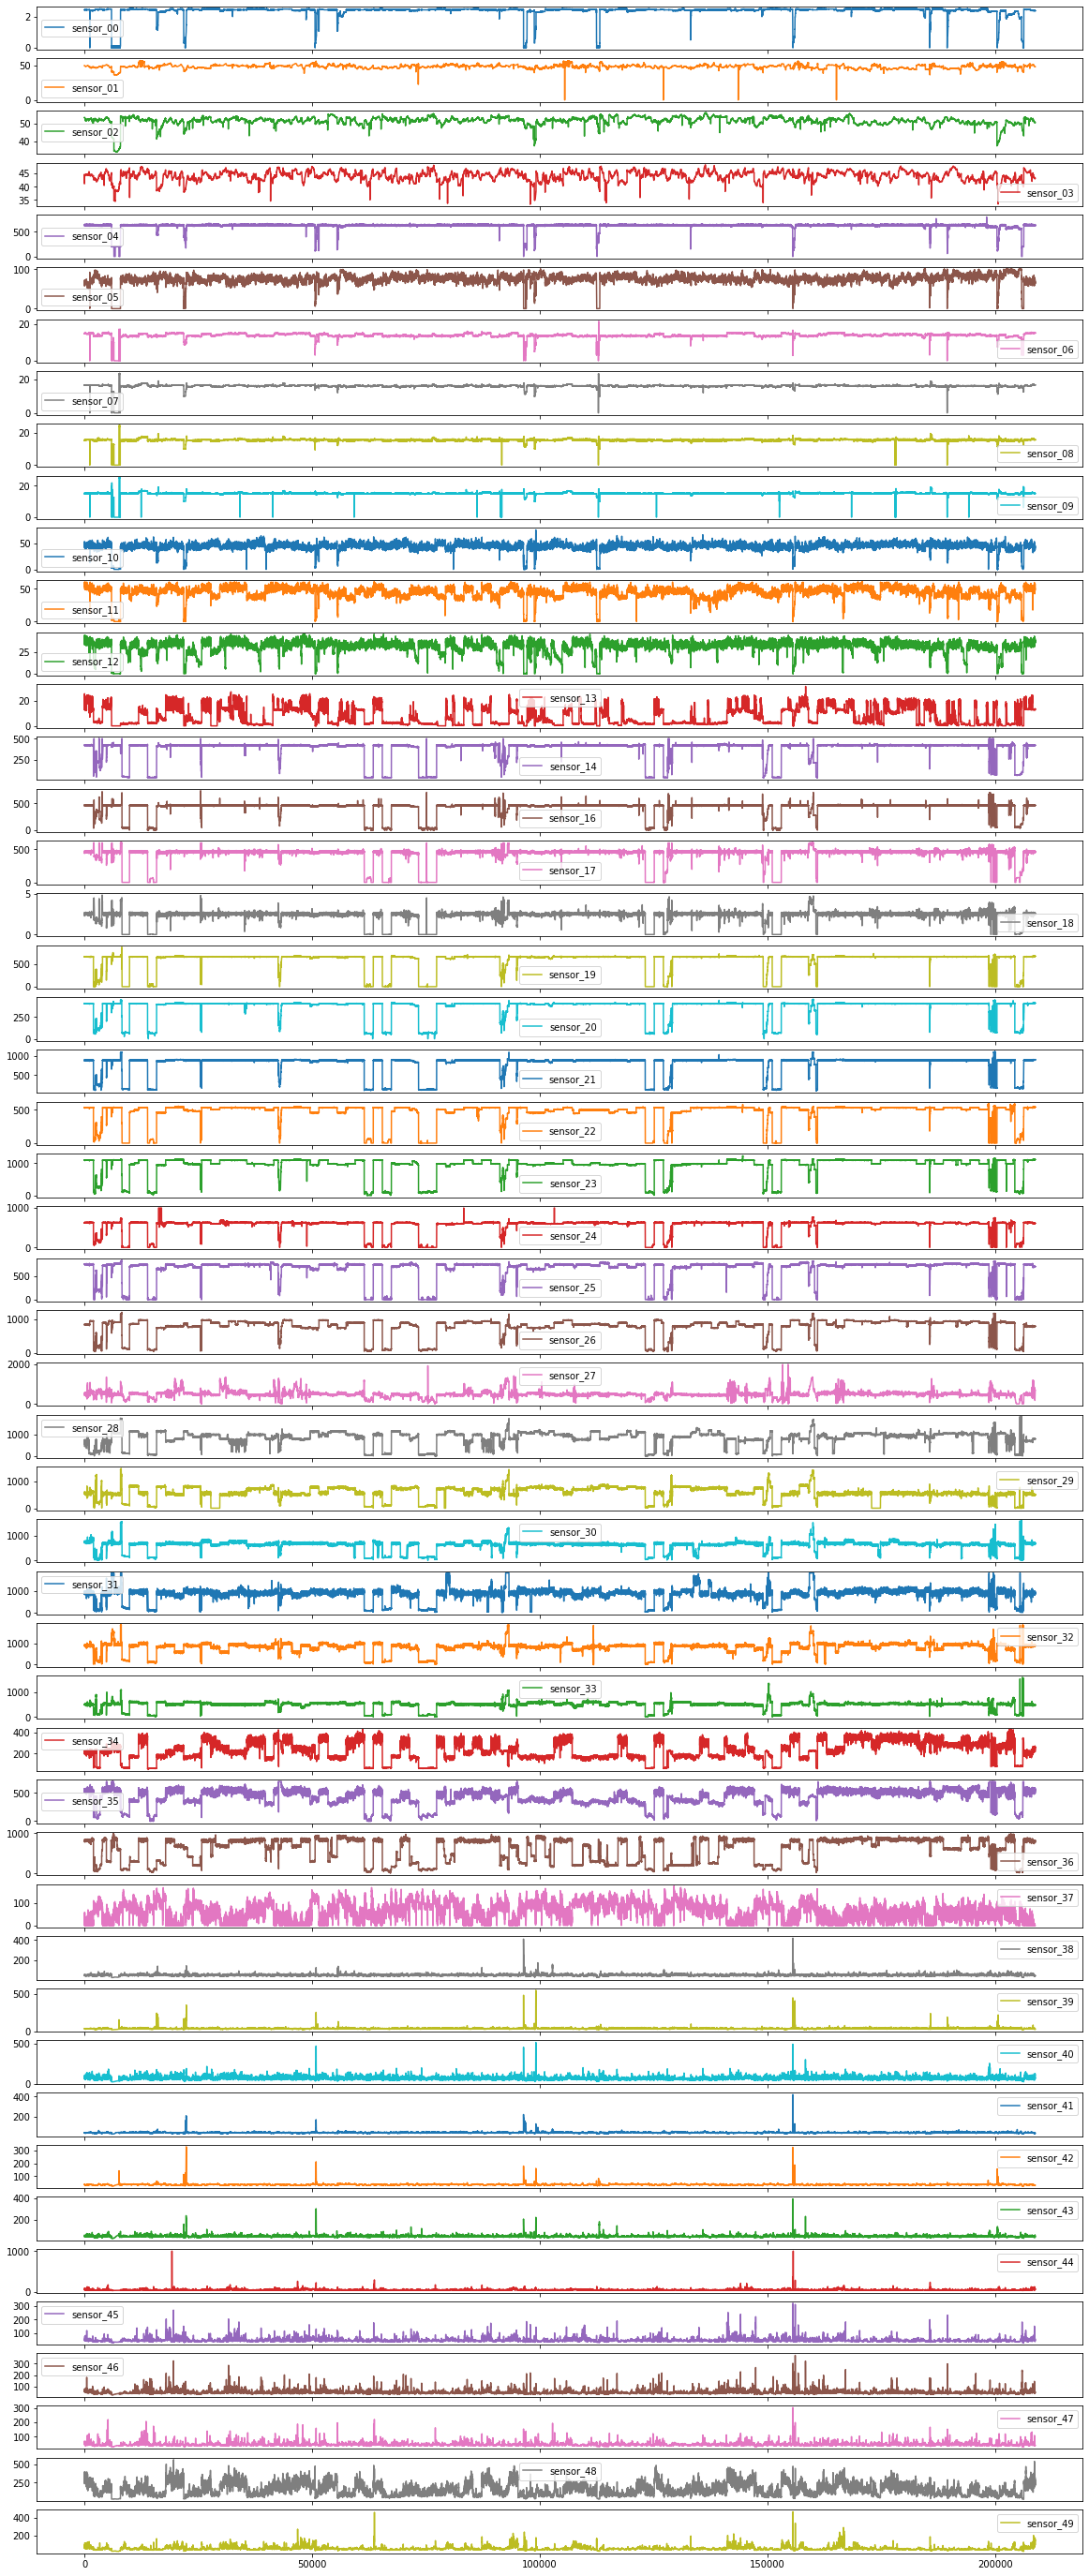

In [21]:
import matplotlib.pyplot as plt
df.drop(columns=['timestamp']).plot(subplots =True, sharex = True, figsize = (20,50))